# Digital Library Figure

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from openai import OpenAI
from sklearn.decomposition import PCA
import umap
import matplotlib.pyplot as plt
import seaborn as sns


from BRAD import llms
llms.load_openai()


KeyboardInterrupt



In [6]:
client = OpenAI()


In [14]:
filepath = "/nfs/turbo/umms-indikar/shared/projects/RAG/papers/Digital_Library_18_Sep_2024"

files = [os.path.join(filepath, file) for file in os.listdir(filepath) if os.path.isfile(os.path.join(filepath, file))]
for i, file in enumerate(files):
    files[i] = file.split('/')[-1]

df = pd.DataFrame({'File': files})

def get_embedding(text, model="text-embedding-3-small"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model).data[0].embedding

df['ada_embedding'] = df['File'].apply(lambda x: get_embedding(x, model='text-embedding-3-small'))
df


,File,ada_embedding
0,epigenetic memory in the context of nuclear re...,"[0.02840851992368698, 0.023417184129357338, 0...."
1,effective graph resistance.pdf,"[0.0051189265213906765, 0.018084699288010597, ..."
2,the laplacian of a hypergraph.pdf,"[-0.034061238169670105, -0.014126780442893505,..."
3,hardy’s “small” discovery remembered.pdf,"[0.02294829860329628, -0.010527572594583035, 0..."
4,generative hypergraph clustering from blockmod...,"[-0.004676940385252237, 0.01491972990334034, 0..."
...,...,...
514,umap uniform manifold approximation and projec...,"[-0.029525047168135643, 0.020522939041256905, ..."
515,integrating microarray-based spatial transcrip...,"[0.011692981235682964, -0.009666702710092068, ..."
516,long-term association of a transcription facto...,"[0.011860456317663193, 0.00816251989454031, 0...."
517,string v11 protein–protein association network...,"[-0.014848146587610245, -0.017734957858920097,..."


In [97]:
# Define categories and keywords
categories = {
    'biology': ['wound healing', 'brain', 'ctcf', 'ismara', 'epidemics', 'epidemic', 'hi-c', 'assay', 'strand', 'cell', 'gene', 'protein', 'dna', 'chromosome', 'reprogramming', 'omics', 'sequencing', 'cancer', 'bio', 'human', 'genome', 'fibroblast', 'rna', 'weintraub', 'tumour'],
    'computing': ['optimal', 'matrices', 'robot', 'matcon', 'principal', 'centrality', 'simplicial', 'algorithm', 'neural', 'network', 'dimension', 'machine', 'tensor', 'kronecker', 'hypergraph', 'control', 'embedding', 'data', 'pagerank', 'decomposition', 'compressed sensing', 'physics'],
    'mathematics': ['dynamics', 'global', 'attractor', 'emerging', 'divergence', 'n-torus', 'theory', 'pbh', 'robustness', 'bifurcation', 'dynamical', 'SVD', 'matrix', 'hypergraph', 'graph', 'hardy', 'eigenvalue', 'mathematics', 'oscillator', 'smale', 'geometric', 'morse', 'math', 'differential', 'topology']
    # Add more categories as needed
}

# Function to categorize based on file name
def categorize_file(file_name):
    file_name_lower = file_name.lower()
    for category, keywords in categories.items():
        if any(keyword in file_name_lower for keyword in keywords):
            return category
    return 'other'  # Default category if no match

# Apply categorization to the file names
df['Category'] = df['File'].apply(categorize_file)


/home/jpic/.local/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


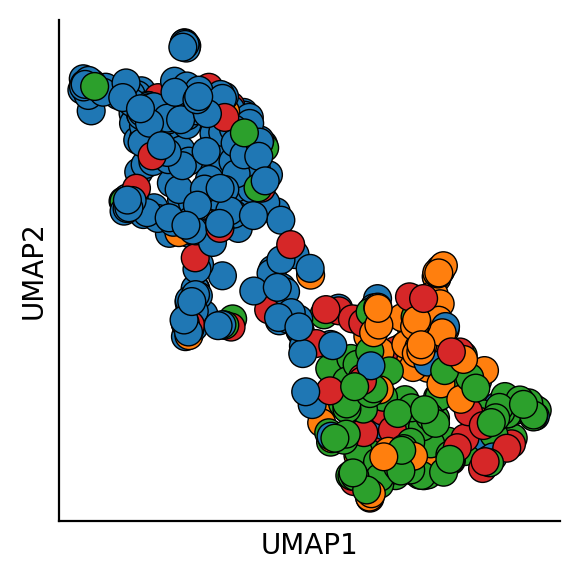

In [109]:
# Perform UMAP for 2D visualization
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_embeddings = umap_model.fit_transform(embeddings)

# Add the UMAP results to the DataFrame for visualization
df['UMAP1'] = umap_embeddings[:, 0]
df['UMAP2'] = umap_embeddings[:, 1]

# Capitalize the first letter of each category for the legend
df['Category'] = df['Category'].str.title()

# Create the plot
plt.figure(figsize=(3,3), dpi=200)  # Equal size for both axes
sns.scatterplot(
    x='UMAP1', 
    y='UMAP2', 
    data=df, 
    s=100,                    # Marker size
    edgecolor='black',         # Black edge for markers
    linewidth=0.5,             # Line width for marker edges
    hue='Category',            # Color by capitalized category
#    palette='Set2'             # Distinct color palette,
    legend=False
)

# Customize axis labels without ticks
# plt.xlabel('UMAP1', fontsize=12)
# plt.ylabel('UMAP2', fontsize=12)
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks

# Equal aspect ratio for x and y axes
# plt.gca().set_aspect('equal') #, adjustable='datalim')

# Place the legend outside the plot, on the right
# plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', borderpad=1, frameon=True, framealpha=1, edgecolor='black', fancybox=False)

# Remove unnecessary spines
sns.despine()

# Display the plot
plt.tight_layout()
plt.show()


In [98]:
df

,File,ada_embedding,PCA1,PCA2,UMAP1,UMAP2,Category
0,epigenetic memory in the context of nuclear re...,"[0.02840851992368698, 0.023417184129357338, 0....",0.416500,-0.035021,2.412949,6.714766,biology
1,effective graph resistance.pdf,"[0.0051189265213906765, 0.018084699288010597, ...",-0.260419,-0.060688,4.673415,1.441667,mathematics
2,the laplacian of a hypergraph.pdf,"[-0.034061238169670105, -0.014126780442893505,...",-0.376484,-0.222943,4.555505,0.162717,computing
3,hardy’s “small” discovery remembered.pdf,"[0.02294829860329628, -0.010527572594583035, 0...",-0.037176,-0.020914,3.951109,3.101706,mathematics
4,generative hypergraph clustering from blockmod...,"[-0.004676940385252237, 0.01491972990334034, 0...",-0.232326,-0.200796,3.866353,0.769346,biology
...,...,...,...,...,...,...,...
514,umap uniform manifold approximation and projec...,"[-0.029525047168135643, 0.020522939041256905, ...",-0.275051,-0.141388,5.331988,0.914984,computing
515,integrating microarray-based spatial transcrip...,"[0.011692981235682964, -0.009666702710092068, ...",0.278317,-0.202169,2.251754,5.209031,biology
516,long-term association of a transcription facto...,"[0.011860456317663193, 0.00816251989454031, 0....",0.397236,-0.031420,2.907348,7.200334,biology
517,string v11 protein–protein association network...,"[-0.014848146587610245, -0.017734957858920097,...",0.122062,-0.322684,3.658395,6.103397,biology


In [99]:
list(df[df['Category'] == 'other']['File'])

['population structure and eigenanalysis.pdf',
 'multirelation - a correlation among more than two variables.pdf',
 'disentangling the 4d nucleome.pdf',
 'immunology for physicists.pdf',
 'higher order approximation of isochrons.pdf',
 'beyond link prediction predicting hyperlinks in adjacency space.pdf',
 'transformers for modeling physical systems.pdf',
 'the anatomy of a large-scale hypertextual web search engine.pdf',
 'local activity is the origin of complexity.pdf',
 'dynamic condensates activate transcription.pdf',
 'quotes from kobe bryant.pdf',
 'stress-mediated exit to quiescence restricted by increasing persistence in cdk46 activation.pdf',
 'endocytosis as a stabilizing mechanism for tissue homeostasis.pdf',
 'a multi-way correlation coefficient.pdf',
 'differentiation therapy revisited.pdf',
 'the organization of replication and transcription.pdf',
 'topological persistence and simplification.pdf',
 'a tutorial on spectral clustering.pdf',
 'finding a horseshoe on the beac

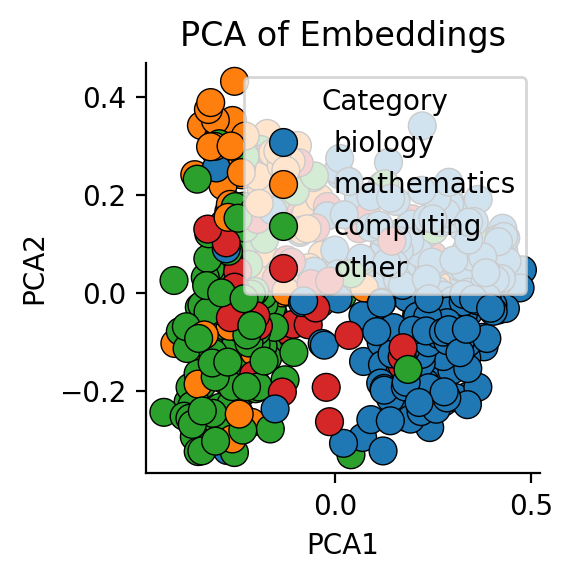

In [100]:
# Extract embeddings as a NumPy array for dimensionality reduction
embeddings = np.stack(df['ada_embedding'].values)

# Perform PCA for 2D visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Add the PCA results to the DataFrame for visualization
df['PCA1'] = reduced_embeddings[:, 0]
df['PCA2'] = reduced_embeddings[:, 1]

# Plot the PCA-reduced embeddings
plt.figure(figsize=(3, 3), dpi=200)
sns.scatterplot(x='PCA1',
                y='PCA2',
                data=df,
                s=100,
                edgecolor='black',
                linewidth=0.5,
                hue='Category'
               )
plt.title('PCA of Embeddings')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.tight_layout()
sns.despine()
plt.show()


/home/jpic/.local/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


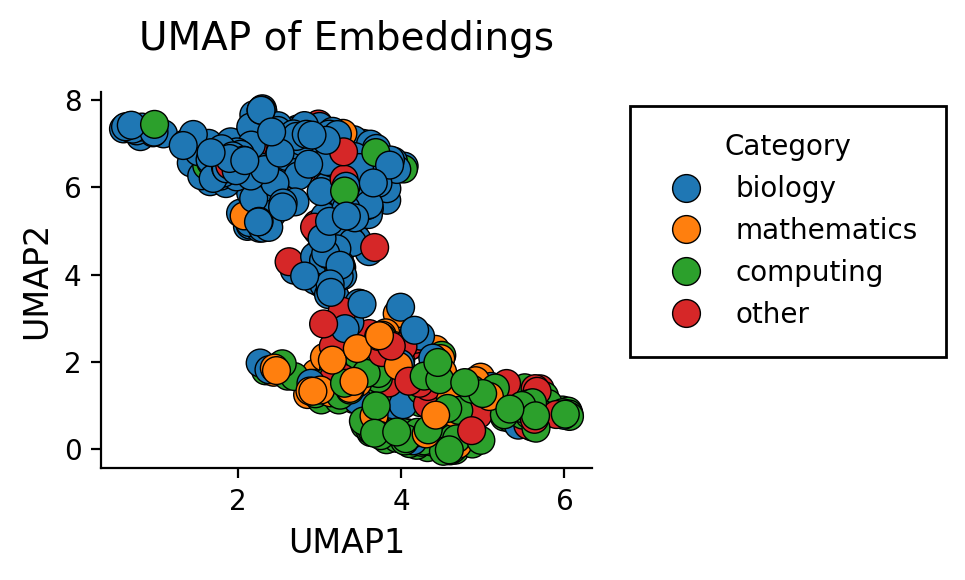

In [101]:
# Perform UMAP for 2D visualization
umap_model = umap.UMAP(n_components=3, random_state=42)
umap_embeddings = umap_model.fit_transform(embeddings)

# Add the UMAP results to the DataFrame for visualization
df['UMAP1'] = umap_embeddings[:, 0]
df['UMAP2'] = umap_embeddings[:, 1]

# Plot the UMAP-reduced embeddings
plt.figure(figsize=(5, 3), dpi=200)
sns.scatterplot(x='UMAP1',
                y='UMAP2',
                data=df,
                s=100,
                edgecolor='black',
                linewidth=0.5,
                hue='Category'
               )

# Customize axis labels and title
plt.title('UMAP of Embeddings', fontsize=14, pad=15)  # Add padding to title for spacing
plt.xlabel('UMAP1', fontsize=12)
plt.ylabel('UMAP2', fontsize=12)

# Place the legend outside the plot, on the right
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', borderpad=1, frameon=True, framealpha=1, edgecolor='black', fancybox=False)

# Final layout adjustments
plt.tight_layout()
sns.despine()

# Display the plot
plt.show()
